In [1]:
import pandas as pd
import numpy as np
from functools import reduce
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder,StandardScaler
from sklearn.preprocessing import LabelEncoder


In [2]:
all_sheets = pd.read_excel('Customer_Churn_Data_Large.xlsx',sheet_name = None)

In [3]:
df1 = all_sheets['Customer_Demographics']
df2 = all_sheets['Transaction_History']
df3 = all_sheets['Customer_Service']
df4 = all_sheets['Online_Activity']
df5 = all_sheets['Churn_Status']
df4.head()

,CustomerID,LastLoginDate,LoginFrequency,ServiceUsage
0,1,2023-10-21,34,Mobile App
1,2,2023-12-05,5,Website
2,3,2023-11-15,3,Website
3,4,2023-08-25,2,Website
4,5,2023-10-27,41,Website


In [4]:
dfs = [df1,df2,df3,df4,df5]
df = reduce(lambda left, right: left.merge(right, on="CustomerID", how="inner"), dfs)

df.head()


,CustomerID,Age,Gender,MaritalStatus,IncomeLevel,TransactionID,TransactionDate,AmountSpent,ProductCategory,InteractionID,InteractionDate,InteractionType,ResolutionStatus,LastLoginDate,LoginFrequency,ServiceUsage,ChurnStatus
0,1,62,M,Single,Low,7194,2022-03-27,416.50,Electronics,6363,2022-03-31,Inquiry,Resolved,2023-10-21,34,Mobile App,0
1,2,65,M,Married,Low,7250,2022-08-08,54.96,Clothing,3329,2022-03-17,Inquiry,Resolved,2023-12-05,5,Website,1
2,2,65,M,Married,Low,9660,2022-07-25,197.50,Electronics,3329,2022-03-17,Inquiry,Resolved,2023-12-05,5,Website,1
3,2,65,M,Married,Low,2998,2022-01-25,101.31,Furniture,3329,2022-03-17,Inquiry,Resolved,2023-12-05,5,Website,1
4,2,65,M,Married,Low,1228,2022-07-24,397.37,Clothing,3329,2022-03-17,Inquiry,Resolved,2023-12-05,5,Website,1


In [5]:
df.drop(['TransactionID','ProductCategory'],axis = 1,inplace = True)
df.drop(['InteractionID'],axis = 1,inplace = True)
df.head()

,CustomerID,Age,Gender,MaritalStatus,IncomeLevel,TransactionDate,AmountSpent,InteractionDate,InteractionType,ResolutionStatus,LastLoginDate,LoginFrequency,ServiceUsage,ChurnStatus
0,1,62,M,Single,Low,2022-03-27,416.50,2022-03-31,Inquiry,Resolved,2023-10-21,34,Mobile App,0
1,2,65,M,Married,Low,2022-08-08,54.96,2022-03-17,Inquiry,Resolved,2023-12-05,5,Website,1
2,2,65,M,Married,Low,2022-07-25,197.50,2022-03-17,Inquiry,Resolved,2023-12-05,5,Website,1
3,2,65,M,Married,Low,2022-01-25,101.31,2022-03-17,Inquiry,Resolved,2023-12-05,5,Website,1
4,2,65,M,Married,Low,2022-07-24,397.37,2022-03-17,Inquiry,Resolved,2023-12-05,5,Website,1


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5204 entries, 0 to 5203
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   CustomerID        5204 non-null   int64         
 1   Age               5204 non-null   int64         
 2   Gender            5204 non-null   object        
 3   MaritalStatus     5204 non-null   object        
 4   IncomeLevel       5204 non-null   object        
 5   TransactionDate   5204 non-null   datetime64[ns]
 6   AmountSpent       5204 non-null   float64       
 7   InteractionDate   5204 non-null   datetime64[ns]
 8   InteractionType   5204 non-null   object        
 9   ResolutionStatus  5204 non-null   object        
 10  LastLoginDate     5204 non-null   datetime64[ns]
 11  LoginFrequency    5204 non-null   int64         
 12  ServiceUsage      5204 non-null   object        
 13  ChurnStatus       5204 non-null   int64         
dtypes: datetime64[ns](3), fl

In [7]:
df.head()

,CustomerID,Age,Gender,MaritalStatus,IncomeLevel,TransactionDate,AmountSpent,InteractionDate,InteractionType,ResolutionStatus,LastLoginDate,LoginFrequency,ServiceUsage,ChurnStatus
0,1,62,M,Single,Low,2022-03-27,416.50,2022-03-31,Inquiry,Resolved,2023-10-21,34,Mobile App,0
1,2,65,M,Married,Low,2022-08-08,54.96,2022-03-17,Inquiry,Resolved,2023-12-05,5,Website,1
2,2,65,M,Married,Low,2022-07-25,197.50,2022-03-17,Inquiry,Resolved,2023-12-05,5,Website,1
3,2,65,M,Married,Low,2022-01-25,101.31,2022-03-17,Inquiry,Resolved,2023-12-05,5,Website,1
4,2,65,M,Married,Low,2022-07-24,397.37,2022-03-17,Inquiry,Resolved,2023-12-05,5,Website,1


In [8]:
df.sample(5)

,CustomerID,Age,Gender,MaritalStatus,IncomeLevel,TransactionDate,AmountSpent,InteractionDate,InteractionType,ResolutionStatus,LastLoginDate,LoginFrequency,ServiceUsage,ChurnStatus
3822,733,23,M,Divorced,Low,2022-01-22,101.43,2022-02-02,Inquiry,Unresolved,2023-01-15,6,Online Banking,1
3179,612,69,F,Divorced,Medium,2022-01-30,390.91,2022-03-13,Feedback,Resolved,2023-12-17,41,Online Banking,0
3705,712,26,F,Widowed,High,2022-12-03,377.80,2022-06-26,Feedback,Resolved,2023-11-30,37,Mobile App,0
5153,988,31,F,Widowed,High,2022-04-19,39.42,2022-02-22,Inquiry,Unresolved,2023-02-14,31,Website,0
1027,195,42,F,Married,Medium,2022-04-10,361.18,2022-09-16,Inquiry,Unresolved,2023-03-07,14,Website,0


In [9]:
#EDA

In [10]:
#summary statistics
num_col = df[['Age','AmountSpent','LoginFrequency']]
stats = num_col.describe()
print(stats)

               Age  AmountSpent  LoginFrequency
count  5204.000000  5204.000000     5204.000000
mean     43.140085   254.354940       25.918332
std      15.430343   143.329654       14.110627
min      18.000000     5.180000        1.000000
25%      29.000000   128.940000       14.000000
50%      43.000000   255.175000       27.000000
75%      57.000000   378.605000       38.000000
max      69.000000   499.700000       49.000000


In [11]:
#categorical data value count
gender_value = df['Gender'].value_counts()
print(gender_value)
marital_value = df['MaritalStatus'].value_counts()
print(marital_value)
reso_value = df['ResolutionStatus'].value_counts()
print(reso_value)
serv_value  = df['ServiceUsage'].value_counts()
print(serv_value)
interact_value = df['InteractionType'].value_counts()
print(interact_value)
income_value = df['IncomeLevel'].value_counts()
print(income_value)

Gender
F    2857
M    2347
Name: count, dtype: int64
MaritalStatus
Divorced    1425
Widowed     1405
Single      1209
Married     1165
Name: count, dtype: int64
ResolutionStatus
Resolved      2693
Unresolved    2511
Name: count, dtype: int64
ServiceUsage
Online Banking    1914
Mobile App        1666
Website           1624
Name: count, dtype: int64
InteractionType
Feedback     1921
Complaint    1769
Inquiry      1514
Name: count, dtype: int64
IncomeLevel
Medium    1800
Low       1705
High      1699
Name: count, dtype: int64


In [12]:
#Visualization

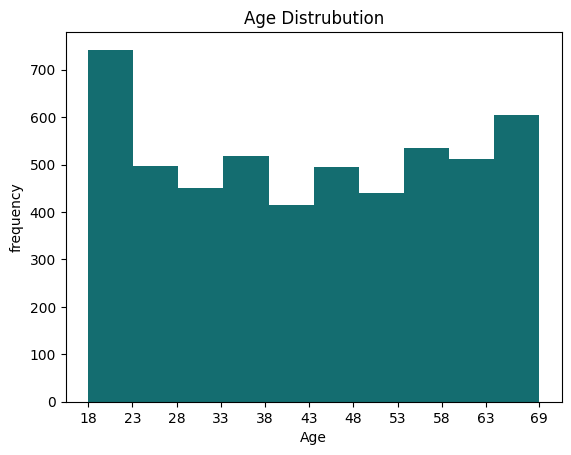

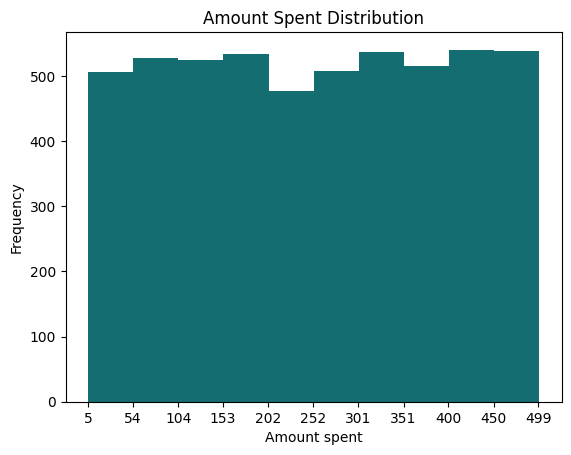

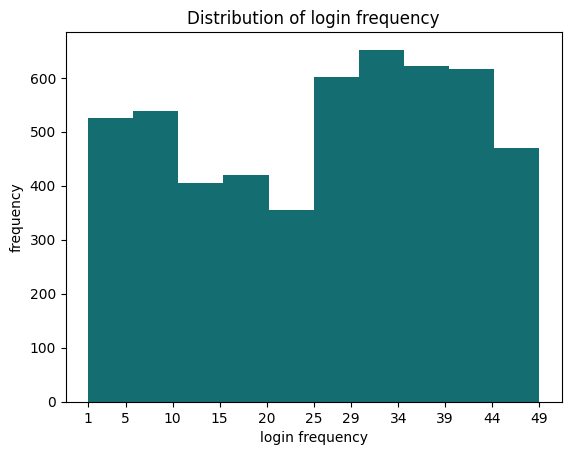

In [13]:
#histograms
#age
fig,ax = plt.subplots()
count = ax.hist(df['Age'],color = '#146d70')

ax.set_title('Age Distrubution')
ax.set_xlabel('Age')
ax.set_ylabel('frequency')
ax.set_xticks(list(map(int,count[1])))
plt.show()

#amount spent
fig,ax = plt.subplots()
count = ax.hist(df['AmountSpent'],color = '#146d70')

ax.set_title("Amount Spent Distribution")
ax.set_ylabel('Frequency')
ax.set_xlabel('Amount spent')
ax.set_xticks(list(map(int,count[1])))
plt.show()

#login frequency
fig,ax = plt.subplots()
count = ax.hist(df['LoginFrequency'],color = '#146d70')

ax.set_title('Distribution of login frequency')
ax.set_ylabel('frequency')
ax.set_xlabel('login frequency')
ax.set_xticks(list(map(int,count[1])))
plt.show()


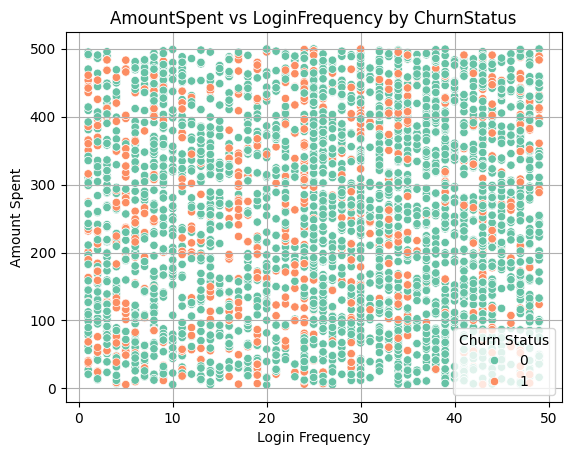

In [14]:
#scatter plot login frequency vs amount spent based on churn status
sns.scatterplot(data= df,x = 'LoginFrequency', y = 'AmountSpent',hue = 'ChurnStatus',palette = 'Set2')
plt.title('AmountSpent vs LoginFrequency by ChurnStatus')
plt.xlabel('Login Frequency')
plt.ylabel('Amount Spent')
plt.legend(title = 'Churn Status')
plt.grid(True)
plt.show()

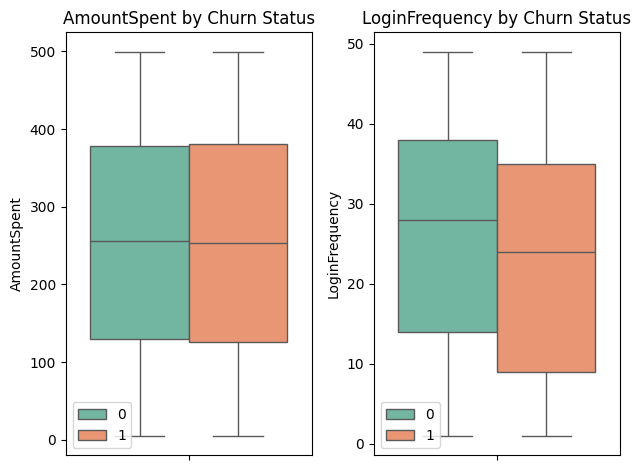

In [15]:
#box plot
plt.subplot(1,2,1)
sns.boxplot(data = df, hue= 'ChurnStatus', y = 'AmountSpent',palette = 'Set2')
plt.title('AmountSpent by Churn Status')
plt.legend(loc = 'lower left')
plt.subplot(1,2,2)
sns.boxplot(data = df,hue = 'ChurnStatus', y = 'LoginFrequency',palette = 'Set2')
plt.title('LoginFrequency by Churn Status')

plt.tight_layout()
plt.legend(loc = 'lower left')
plt.show()

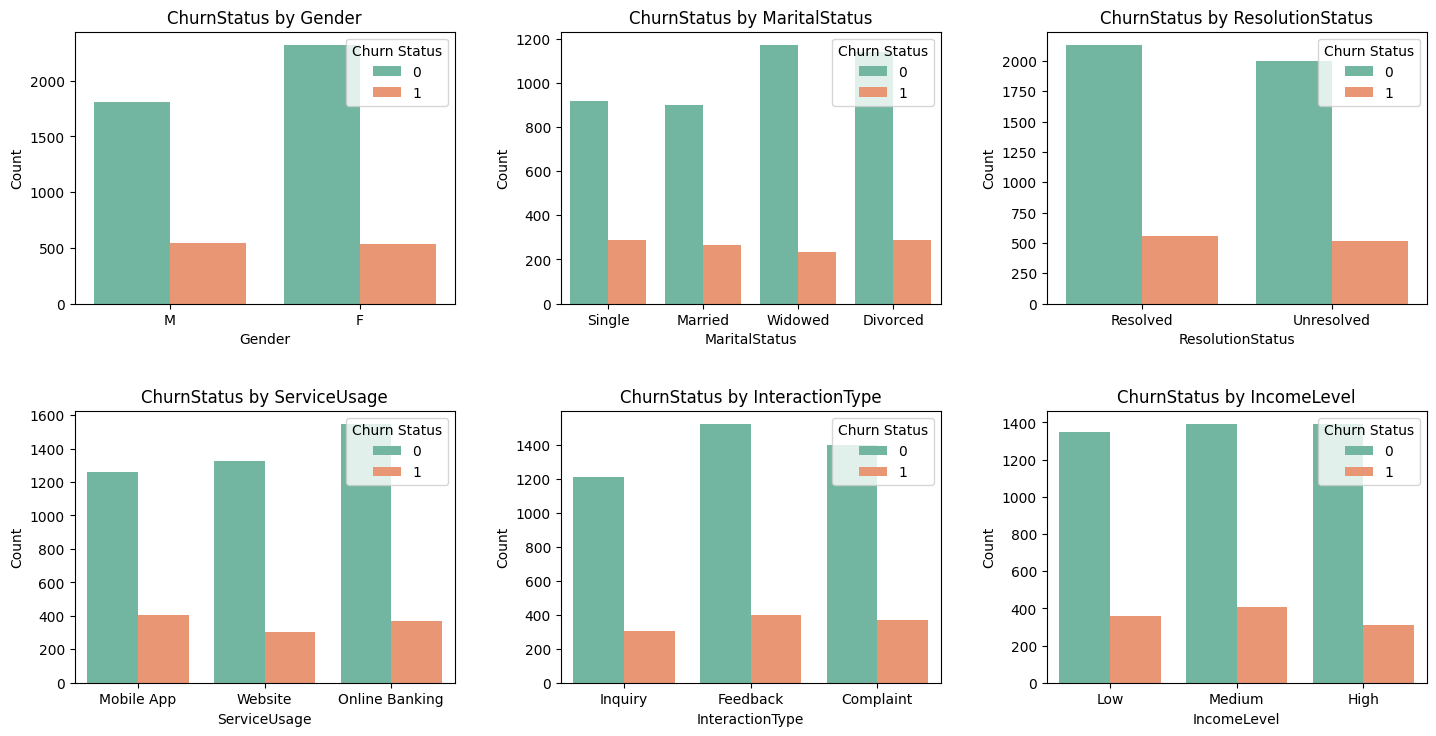

In [16]:
categorical_col = ['Gender','MaritalStatus','ResolutionStatus','ServiceUsage','InteractionType','IncomeLevel']
plt.figure(figsize = (15,8))
for i,col in enumerate(categorical_col):
    plt.subplot(2,3,i+1)
    sns.countplot(data = df, x = col, hue = 'ChurnStatus', palette = 'Set2')
    plt.title(f'ChurnStatus by {col}')
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.legend(title = 'Churn Status',loc = 'upper right')

plt.tight_layout(pad = 3.0)
plt.show()

In [17]:
import datetime as dt
df['TransactionDate'] = pd.to_datetime(df['TransactionDate'])
df['InteractionDate'] = pd.to_datetime(df['InteractionDate'])
df['LastLoginDate'] = pd.to_datetime(df['LastLoginDate'])

In [18]:
today = pd.to_datetime('2024-01-09')
df['DaysSinceTransaction'] = (today - df['TransactionDate']).dt.days
df['DaysSinceInteraction'] = (today - df['InteractionDate']).dt.days
df['DaysSinceLogin'] = (today - df['LastLoginDate']).dt.days
df['InteractionLag'] = (df['InteractionDate']-df['TransactionDate']).dt.days

In [19]:
#flag for last 30 days login
df['LoggedInLast30Days'] = df['DaysSinceLogin']<=30

In [20]:
#Standardizing numerical features features
num_col = df[['Age','AmountSpent','LoginFrequency','DaysSinceTransaction','DaysSinceInteraction','DaysSinceLogin','InteractionLag']]
scaler = StandardScaler()
scaled_features = scaler.fit_transform(num_col)
scaled = pd.DataFrame(scaled_features,columns = scaler.get_feature_names_out())
scaled
scaled_df = pd.concat([df.drop(columns = num_col),scaled],axis = 1)
scaled_df


,CustomerID,Gender,MaritalStatus,IncomeLevel,TransactionDate,InteractionDate,InteractionType,ResolutionStatus,LastLoginDate,ServiceUsage,ChurnStatus,LoggedInLast30Days,Age,AmountSpent,LoginFrequency,DaysSinceTransaction,DaysSinceInteraction,DaysSinceLogin,InteractionLag
0,1,M,Single,Low,2022-03-27,2022-03-31,Inquiry,Resolved,2023-10-21,Mobile App,0,False,1.222379,1.131382,0.572791,0.903001,0.905346,-1.039297,0.011595
1,2,M,Married,Low,2022-08-08,2022-03-17,Inquiry,Resolved,2023-12-05,Website,1,False,1.416820,-1.391297,-1.482595,-0.379422,1.042093,-1.469922,-1.018477
2,2,M,Married,Low,2022-07-25,2022-03-17,Inquiry,Resolved,2023-12-05,Website,1,False,1.416820,-0.396711,-1.482595,-0.245437,1.042093,-1.469922,-0.921038
3,2,M,Married,Low,2022-01-25,2022-03-17,Inquiry,Resolved,2023-12-05,Website,1,False,1.416820,-1.067885,-1.482595,1.486791,1.042093,-1.469922,0.338713
4,2,M,Married,Low,2022-07-24,2022-03-17,Inquiry,Resolved,2023-12-05,Website,1,False,1.416820,0.997901,-1.482595,-0.235867,1.042093,-1.469922,-0.914078
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5199,995,F,Divorced,Low,2022-03-19,2022-05-02,Inquiry,Resolved,2023-07-31,Website,1,False,-1.305351,-0.199105,0.572791,0.979564,0.592782,-0.254603,0.289993
5200,995,F,Divorced,Low,2022-08-30,2022-05-02,Inquiry,Resolved,2023-07-31,Website,1,False,-1.305351,1.678426,0.572791,-0.589969,0.592782,-0.254603,-0.851438
5201,995,F,Divorced,Low,2022-10-23,2022-05-02,Inquiry,Resolved,2023-07-31,Website,1,False,-1.305351,-1.068583,0.572791,-1.106766,0.592782,-0.254603,-1.227275
5202,995,F,Divorced,Low,2022-10-18,2022-05-02,Inquiry,Resolved,2023-07-31,Website,1,False,-1.305351,-1.259071,0.572791,-1.058914,0.592782,-0.254603,-1.192476


In [21]:
df.isnull().sum()

CustomerID              0
Age                     0
Gender                  0
MaritalStatus           0
IncomeLevel             0
TransactionDate         0
AmountSpent             0
InteractionDate         0
InteractionType         0
ResolutionStatus        0
LastLoginDate           0
LoginFrequency          0
ServiceUsage            0
ChurnStatus             0
DaysSinceTransaction    0
DaysSinceInteraction    0
DaysSinceLogin          0
InteractionLag          0
LoggedInLast30Days      0
dtype: int64

In [22]:
#categorical data label indicator
scaled_df.head()

,CustomerID,Gender,MaritalStatus,IncomeLevel,TransactionDate,InteractionDate,InteractionType,ResolutionStatus,LastLoginDate,ServiceUsage,ChurnStatus,LoggedInLast30Days,Age,AmountSpent,LoginFrequency,DaysSinceTransaction,DaysSinceInteraction,DaysSinceLogin,InteractionLag
0,1,M,Single,Low,2022-03-27,2022-03-31,Inquiry,Resolved,2023-10-21,Mobile App,0,False,1.222379,1.131382,0.572791,0.903001,0.905346,-1.039297,0.011595
1,2,M,Married,Low,2022-08-08,2022-03-17,Inquiry,Resolved,2023-12-05,Website,1,False,1.416820,-1.391297,-1.482595,-0.379422,1.042093,-1.469922,-1.018477
2,2,M,Married,Low,2022-07-25,2022-03-17,Inquiry,Resolved,2023-12-05,Website,1,False,1.416820,-0.396711,-1.482595,-0.245437,1.042093,-1.469922,-0.921038
3,2,M,Married,Low,2022-01-25,2022-03-17,Inquiry,Resolved,2023-12-05,Website,1,False,1.416820,-1.067885,-1.482595,1.486791,1.042093,-1.469922,0.338713
4,2,M,Married,Low,2022-07-24,2022-03-17,Inquiry,Resolved,2023-12-05,Website,1,False,1.416820,0.997901,-1.482595,-0.235867,1.042093,-1.469922,-0.914078


In [23]:
label_encoder = LabelEncoder()
label_encoders = {}

for col in categorical_col:
    le = LabelEncoder()
    scaled_df[col] = le.fit_transform(scaled_df[col])
    label_encoders[col] = le

scaled_df.head()

,CustomerID,Gender,MaritalStatus,IncomeLevel,TransactionDate,InteractionDate,InteractionType,ResolutionStatus,LastLoginDate,ServiceUsage,ChurnStatus,LoggedInLast30Days,Age,AmountSpent,LoginFrequency,DaysSinceTransaction,DaysSinceInteraction,DaysSinceLogin,InteractionLag
0,1,1,2,1,2022-03-27,2022-03-31,2,0,2023-10-21,0,0,False,1.222379,1.131382,0.572791,0.903001,0.905346,-1.039297,0.011595
1,2,1,1,1,2022-08-08,2022-03-17,2,0,2023-12-05,2,1,False,1.416820,-1.391297,-1.482595,-0.379422,1.042093,-1.469922,-1.018477
2,2,1,1,1,2022-07-25,2022-03-17,2,0,2023-12-05,2,1,False,1.416820,-0.396711,-1.482595,-0.245437,1.042093,-1.469922,-0.921038
3,2,1,1,1,2022-01-25,2022-03-17,2,0,2023-12-05,2,1,False,1.416820,-1.067885,-1.482595,1.486791,1.042093,-1.469922,0.338713
4,2,1,1,1,2022-07-24,2022-03-17,2,0,2023-12-05,2,1,False,1.416820,0.997901,-1.482595,-0.235867,1.042093,-1.469922,-0.914078


In [24]:
cols = [col for col in scaled_df.columns if col != 'ChurnStatus'] 
cols.append('ChurnStatus')  
scaled_df = scaled_df[cols]
scaled_df.sample()

,CustomerID,Gender,MaritalStatus,IncomeLevel,TransactionDate,InteractionDate,InteractionType,ResolutionStatus,LastLoginDate,ServiceUsage,LoggedInLast30Days,Age,AmountSpent,LoginFrequency,DaysSinceTransaction,DaysSinceInteraction,DaysSinceLogin,InteractionLag,ChurnStatus
278,43,1,2,1,2022-11-02,2022-04-01,2,1,2023-05-25,0,False,-0.397961,0.879073,-0.065087,-1.202469,0.895579,0.386549,-1.512633,0


In [25]:
scaled_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5204 entries, 0 to 5203
Data columns (total 19 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   CustomerID            5204 non-null   int64         
 1   Gender                5204 non-null   int32         
 2   MaritalStatus         5204 non-null   int32         
 3   IncomeLevel           5204 non-null   int32         
 4   TransactionDate       5204 non-null   datetime64[ns]
 5   InteractionDate       5204 non-null   datetime64[ns]
 6   InteractionType       5204 non-null   int32         
 7   ResolutionStatus      5204 non-null   int32         
 8   LastLoginDate         5204 non-null   datetime64[ns]
 9   ServiceUsage          5204 non-null   int32         
 10  LoggedInLast30Days    5204 non-null   bool          
 11  Age                   5204 non-null   float64       
 12  AmountSpent           5204 non-null   float64       
 13  LoginFrequency    

In [26]:
scaled_df.describe()

,CustomerID,Gender,MaritalStatus,IncomeLevel,TransactionDate,InteractionDate,InteractionType,ResolutionStatus,LastLoginDate,ServiceUsage,Age,AmountSpent,LoginFrequency,DaysSinceTransaction,DaysSinceInteraction,DaysSinceLogin,InteractionLag,ChurnStatus
count,5204.000000,5204.000000,5204.000000,5204.000000,5204,5204,5204.000000,5204.000000,5204,5204.000000,5.204000e+03,5.204000e+03,5.204000e+03,5.204000e+03,5.204000e+03,5.204000e+03,5.204000e+03,5204.000000
mean,496.470407,0.450999,1.498463,1.019408,2022-06-29 08:30:15.219062272,2022-07-01 16:31:10.561106944,0.950999,0.482513,2023-07-04 09:27:31.960030720,0.991929,-1.051341e-16,-1.665761e-16,-6.963428e-17,-2.867294e-16,1.338070e-16,9.830722e-17,2.730756e-17,0.205995
min,1.000000,0.000000,0.000000,0.000000,2022-01-01 00:00:00,2022-01-01 00:00:00,0.000000,0.000000,2023-01-01 00:00:00,0.000000,-1.629419e+00,-1.738641e+00,-1.766096e+00,-1.767118e+00,-1.770988e+00,-1.718727e+00,-2.466146e+00,0.000000
25%,244.000000,0.000000,0.000000,0.000000,2022-03-30 00:00:00,2022-04-07 00:00:00,0.000000,0.000000,2023-04-04 00:00:00,0.000000,-9.164698e-01,-8.750945e-01,-8.447163e-01,-8.675080e-01,-8.332941e-01,-8.479085e-01,-7.052792e-01,0.000000
50%,504.000000,0.000000,2.000000,1.000000,2022-06-27 00:00:00,2022-07-02 00:00:00,1.000000,0.000000,2023-07-11 00:00:00,1.000000,-9.079384e-03,5.722042e-03,7.666363e-02,2.253182e-02,-3.044411e-03,-6.321456e-02,1.159546e-02,0.000000
75%,743.000000,1.000000,3.000000,2.000000,2022-09-28 00:00:00,2022-09-25 00:00:00,2.000000,1.000000,2023-10-01 00:00:00,2.000000,8.983110e-01,8.669664e-01,8.562928e-01,8.742904e-01,8.369729e-01,8.745904e-01,7.075903e-01,0.000000
max,995.000000,1.000000,3.000000,2.000000,2022-12-31 00:00:00,2022-12-30 00:00:00,2.000000,1.000000,2023-12-31 00:00:00,2.000000,1.676074e+00,1.711918e+00,1.635922e+00,1.716479e+00,1.774667e+00,1.764548e+00,2.475417e+00,1.000000
std,286.681289,0.497641,1.156667,0.819829,NaN,NaN,0.792831,0.499742,NaN,0.795149,1.000096e+00,1.000096e+00,1.000096e+00,1.000096e+00,1.000096e+00,1.000096e+00,1.000096e+00,0.404466


In [27]:
scaled_df['ChurnStatus'].value_counts()

ChurnStatus
0    4132
1    1072
Name: count, dtype: int64

In [28]:
scaled_df.to_csv('cleaned_data.csv',index = False)